#Problem - 1: Getting Started with Data Exploration -
Exercises:
1. Data Exploration and Understanding:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Linking the file
data = pd.read_csv('/content/drive/MyDrive/Concept and technology of AI/WHR-2024-5CS037.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Problem 1: Data Exploration
# 1.
print("Dataset Overview:\n")
print(data.head(10))  # Display first 10 rows
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}\n")
print("Columns and their data types:\n", data.dtypes)

Dataset Overview:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    

In [7]:
# 2.
print("\nBasic Statistics:\n")
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
highest_country = data.loc[data['score'].idxmax(), 'Country name']
lowest_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"Mean Score: {mean_score}\nMedian Score: {median_score}\nStandard Deviation: {std_score}")
print(f"Highest Happiness Score: {highest_country}\nLowest Happiness Score: {lowest_country}")



Basic Statistics:

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation: 1.1707165099442995
Highest Happiness Score: Finland
Lowest Happiness Score: Afghanistan


In [8]:
# 3.
missing_values = data.isnull().sum()
print("\nMissing Values by Column:\n", missing_values[missing_values > 0])


Missing Values by Column:
 Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [9]:
# 4.
filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 Countries with score > 7.5 sorted by Log GDP per capita:\n", sorted_data[['Country name', 'Log GDP per capita', 'score']])



Top 10 Countries with score > 7.5 sorted by Log GDP per capita:
   Country name  Log GDP per capita  score
1      Denmark               1.908  7.583
2      Iceland               1.881  7.525
0      Finland               1.844  7.741


In [10]:
# 5.
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nHappiness Category added. Sample data:\n", data[['Country name', 'Log GDP per capita', 'score']].head(5))



Happiness Category added. Sample data:
   Country name  Log GDP per capita  score
0      Finland               1.844  7.741
1      Denmark               1.908  7.583
2      Iceland               1.881  7.525
3       Sweden               1.878  7.344
4       Israel               1.803  7.341


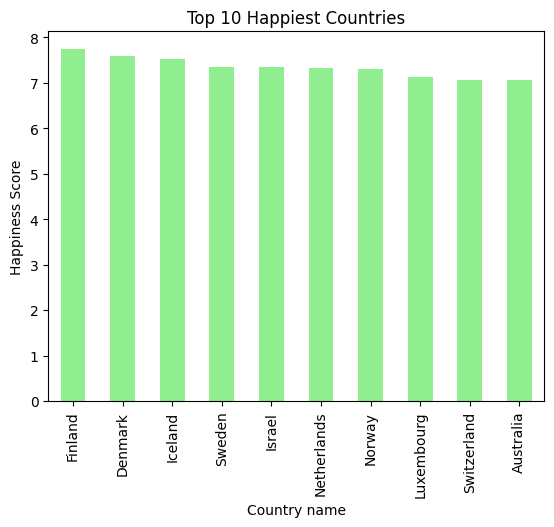

In [12]:
# 6.
# Bar Plot - Top 10 Happiest Countries
happiest_countries = data.nlargest(10, 'score')
happiest_countries.plot(x='Country name', y='score', kind='bar', title='Top 10 Happiest Countries', legend=False,color='lightgreen')
plt.ylabel('Happiness Score')
plt.show()


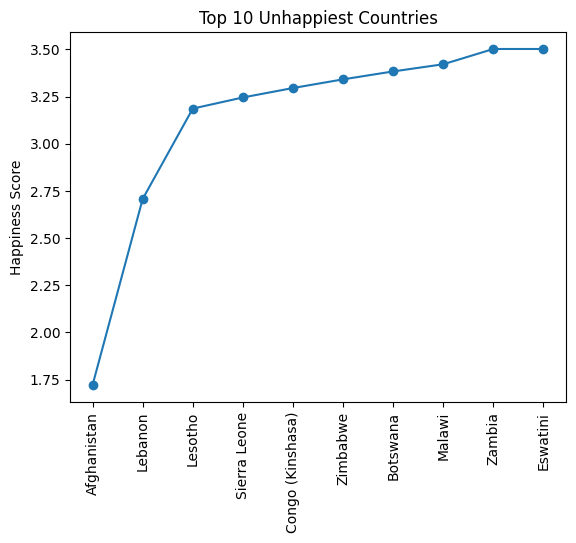

In [15]:
# Line Plot - Top 10 Unhappiest Countries
unhappiest_countries = data.nsmallest(10, 'score')
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

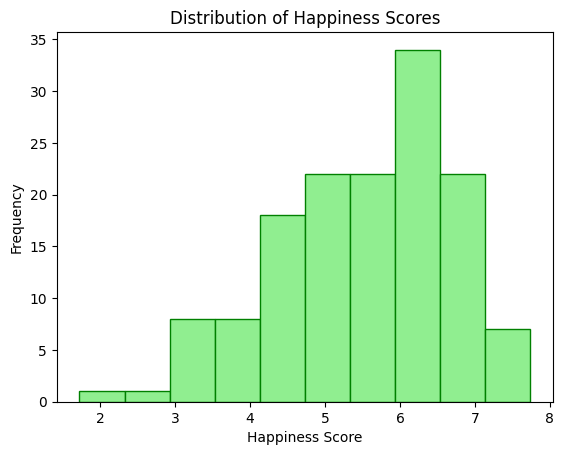

In [9]:
# Histogram - Distribution of Happiness Scores
plt.hist(data['score'], bins=10, color='lightgreen', edgecolor='green')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

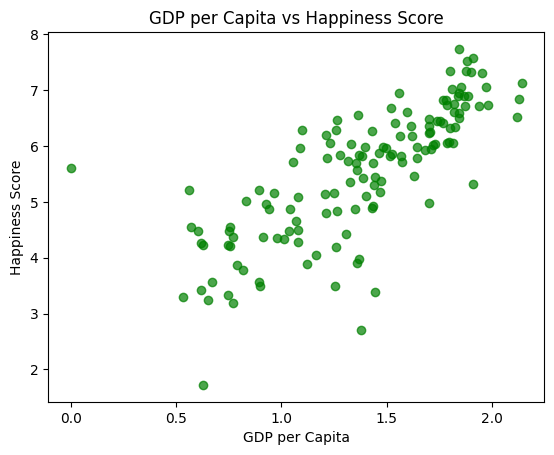

In [ ]:
# Scatter Plot - GDP per Capita vs Score
plt.scatter(data['Log GDP per capita'], data['score'], alpha=0.7, c='green')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Problem 2: Advanced Data Exploration

In [16]:
## Task 1: South Asia Dataset Preparation
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
south_asia_data.to_csv('South_Asia_Data.csv', index=False)
print("\nSouth Asia dataset saved.\n")


South Asia dataset saved.



In [17]:
## Task 2: Composite Score Ranking
def calculate_composite_score(row):
    return 0.4 * row['Log GDP per capita'] + 0.3 * row['Social support'] + 0.3 * row['Healthy life expectancy']

south_asia_data['Composite Score'] = south_asia_data.apply(calculate_composite_score, axis=1)
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asia Composite Scores:\n", south_asia_data[['Country name', 'Composite Score']])



South Asia Composite Scores:
     Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-17-53c6f6b8c99d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = south_asia_data.apply(calculate_composite_score, axis=1)


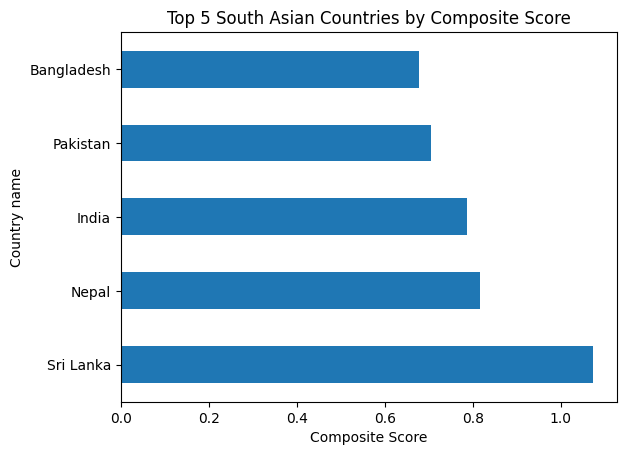

In [19]:
# Visualization - Top 5 Countries by Composite Score
top_5_composite = south_asia_data.head(5)
top_5_composite.plot(x='Country name', y='Composite Score', kind='barh', title='Top 5 South Asian Countries by Composite Score', legend=False)
plt.xlabel('Composite Score')
plt.show()

In [ ]:
# Task 3: Outlier Detection
# Identify outliers using IQR
for column in ['score', 'Log GDP per capita']:
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    south_asia_data[f'{column} Outlier'] = ~south_asia_data[column].between(lower_bound, upper_bound)
    print(f"\nOutliers in {column}:\n", south_asia_data[south_asia_data[f'{column} Outlier']])




Outliers in score:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  score Outlier  
142           0.3238           True  

Outliers in Log GDP per capita:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Scor

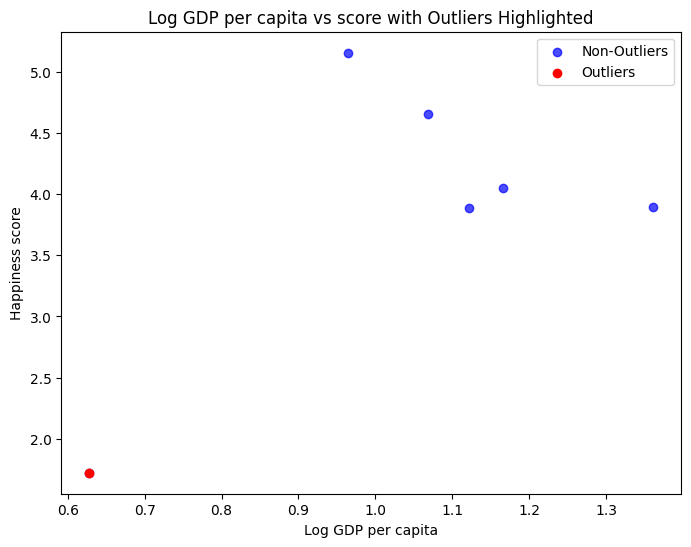

In [ ]:
# Scatter Plot highlighting outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], alpha=0.7, c='blue', label='Non-Outliers')
outliers = south_asia_data[south_asia_data['score Outlier'] | south_asia_data['Log GDP per capita Outlier']]
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.title('Log GDP per capita vs score with Outliers Highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness score')
plt.legend()
plt.show()


Correlation between Freedom to make life choices and score: 0.8005185224163315


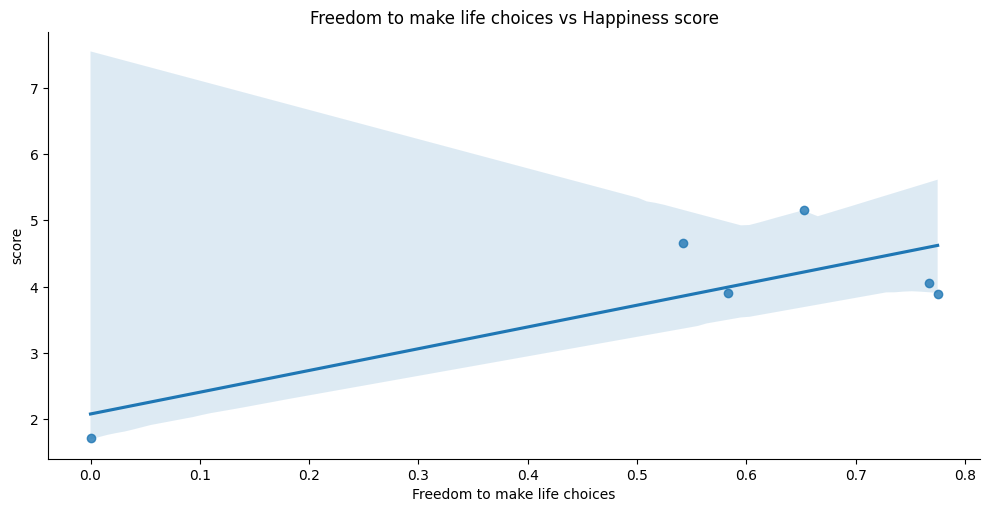

Correlation between Generosity and score: 0.874512371253192


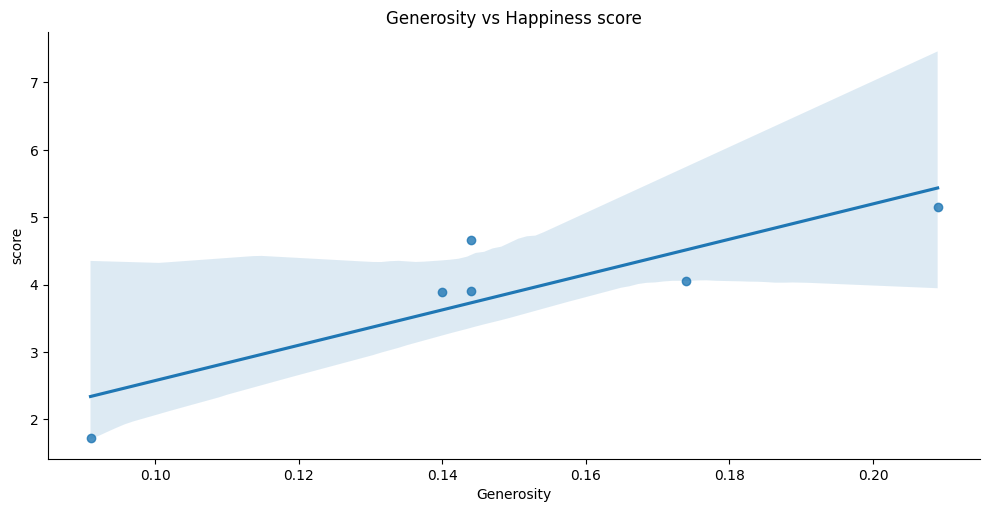

In [ ]:
## Task 4: Metric Trends
# Correlation and Scatter Plots
selected_metrics = ['Freedom to make life choices', 'Generosity']
for metric in selected_metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Correlation between {metric} and score: {correlation}")
    sns.lmplot(x=metric, y='score', data=south_asia_data, aspect=2, height=5)
    plt.title(f'{metric} vs Happiness score')
    plt.show()

In [ ]:
## Task 5: Gap Analysis
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
ranked_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
print("\nCountries ranked by GDP-Score Gap:\n", ranked_gap[['Country name', 'GDP-Score Gap']])



Countries ranked by GDP-Score Gap:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


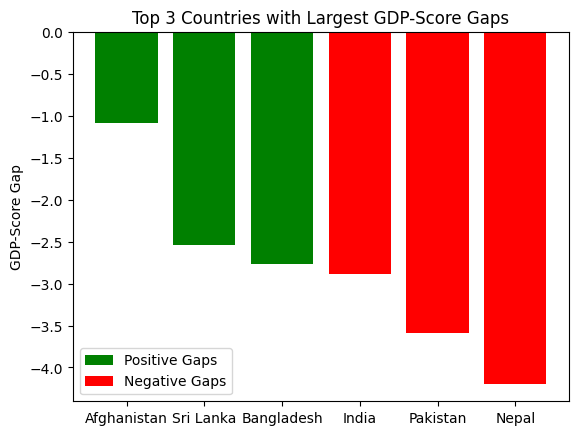

In [ ]:
# Bar Chart - Largest Positive and Negative Gaps
top_positive_gap = ranked_gap.head(3)
top_negative_gap = ranked_gap.tail(3)
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='green', label='Positive Gaps')
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='red', label='Negative Gaps')
plt.title('Top 3 Countries with Largest GDP-Score Gaps')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.show()


# Problem 3: Comparative Analysis

In [ ]:
## Task 1: Middle Eastern Dataset Preparation
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_eastern_countries)]
middle_east_data.to_csv('Middle_East_Data.csv', index=False)
print("\nMiddle East dataset saved.\n")


Middle East dataset saved.



In [ ]:
## Task 2: Descriptive Statistics
mean_south_asia = south_asia_data['score'].mean()
mean_middle_east = middle_east_data['score'].mean()
std_south_asia = south_asia_data['score'].std()
std_middle_east = middle_east_data['score'].std()

print(f"Mean Happiness Score - South Asia: {mean_south_asia}, Middle East: {mean_middle_east}")
print(f"Standard Deviation - South Asia: {std_south_asia}, Middle East: {std_middle_east}")


Mean Happiness Score - South Asia: 3.895666666666667, Middle East: 5.412100000000001
Standard Deviation - South Asia: 1.1770690152521501, Middle East: 1.5662011684327144


In [ ]:
# Task 3: Top and Bottom Performers
# Identify top and bottom performers
top_3_sa = south_asia_data.nlargest(3, 'score')
bottom_3_sa = south_asia_data.nsmallest(3, 'score')
top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')
print("\nTop 3 Countries by Happiness Score - South Asia:\n", top_3_sa[['Country name', 'score']])
print("\nBottom 3 Countries by Happiness Score - South Asia:\n", bottom_3_sa[['Country name', 'score']])


Top 3 Countries by Happiness Score - South Asia:
     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Countries by Happiness Score - South Asia:
     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898


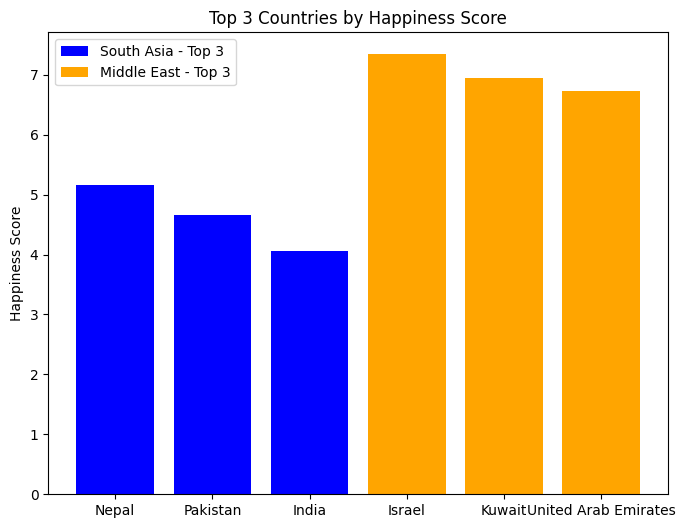

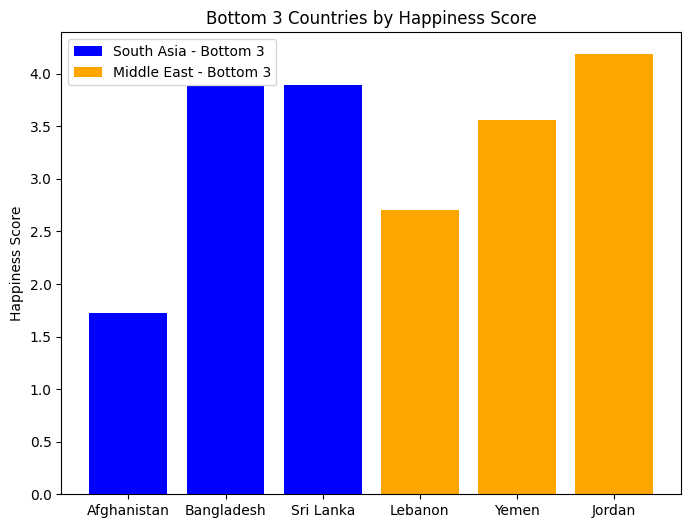

In [ ]:

# Bar Charts
plt.figure(figsize=(8, 6))
plt.bar(top_3_sa['Country name'], top_3_sa['score'], color='blue', label='South Asia - Top 3')
plt.bar(top_3_me['Country name'], top_3_me['score'], color='orange', label='Middle East - Top 3')
plt.title('Top 3 Countries by Happiness Score')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(bottom_3_sa['Country name'], bottom_3_sa['score'], color='blue', label='South Asia - Bottom 3')
plt.bar(bottom_3_me['Country name'], bottom_3_me['score'], color='orange', label='Middle East - Bottom 3')
plt.title('Bottom 3 Countries by Happiness Score')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

Average Log GDP per capita - South Asia: 1.0518333333333334, Middle East: 1.4963333333333333


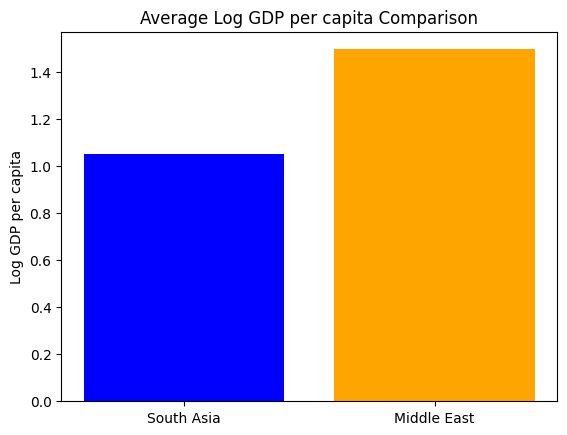

Average Social support - South Asia: 0.6118333333333333, Middle East: 1.1527777777777777


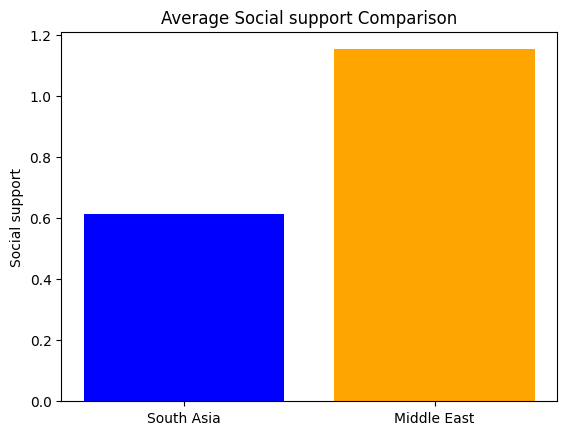

Average Healthy life expectancy - South Asia: 0.4203333333333333, Middle East: 0.5541111111111111


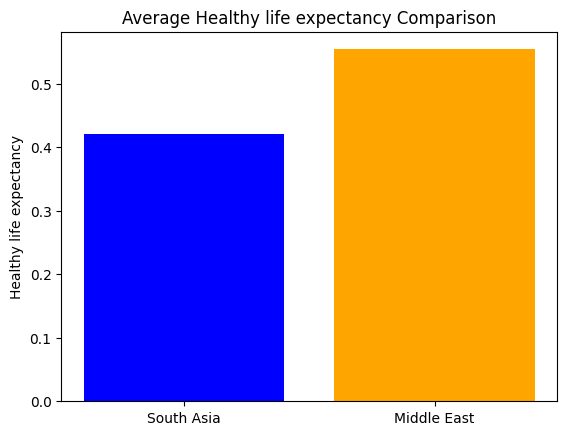

In [ ]:
# Task 4: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
for metric in metrics:
    sa_mean = south_asia_data[metric].mean()
    me_mean = middle_east_data[metric].mean()
    print(f"Average {metric} - South Asia: {sa_mean}, Middle East: {me_mean}")

    # Grouped Bar Chart
    plt.bar(['South Asia', 'Middle East'], [sa_mean, me_mean], color=['blue', 'orange'])
    plt.title(f'Average {metric} Comparison')
    plt.ylabel(metric)
    plt.show()

In [ ]:
## Task 5: Happiness Disparity
range_sa = south_asia_data['score'].max() - south_asia_data['score'].min()
range_me = middle_east_data['score'].max() - middle_east_data['score'].min()
cv_sa = std_south_asia / mean_south_asia
cv_me = std_middle_east / mean_middle_east

print(f"Happiness Range - South Asia: {range_sa}, Middle East: {range_me}")
print(f"Coefficient of Variation - South Asia: {cv_sa}, Middle East: {cv_me}")

Happiness Range - South Asia: 3.4370000000000003, Middle East: 4.634
Coefficient of Variation - South Asia: 0.30214828833374263, Middle East: 0.28938880812119405


Correlation between Freedom to make life choices and Score - South Asia: 0.8005185224163315, Middle East: 0.8632202433827543


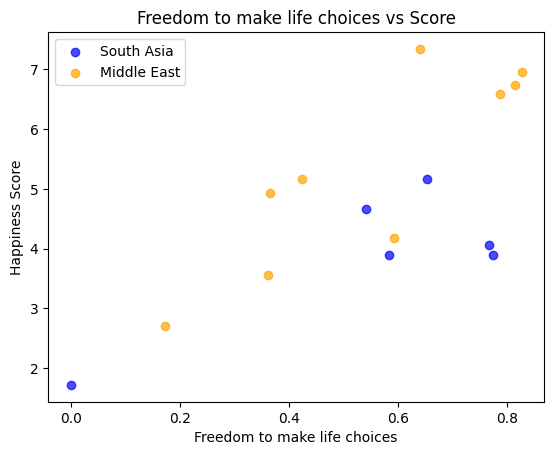

Correlation between Generosity and Score - South Asia: 0.874512371253192, Middle East: 0.6275236536964182


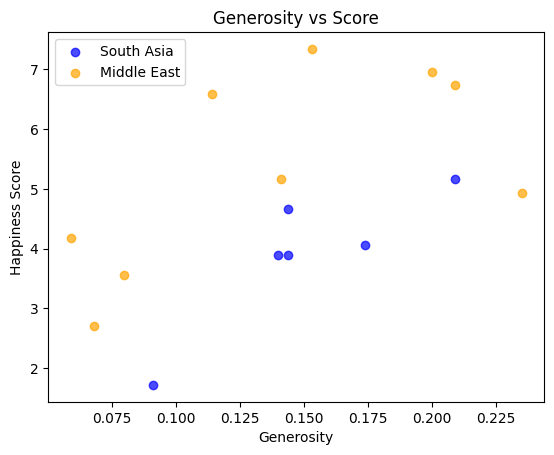

In [ ]:
## Task 6: Correlation Analysis
selected_metrics = ['Freedom to make life choices', 'Generosity']
for metric in selected_metrics:
    corr_sa = south_asia_data[metric].corr(south_asia_data['score'])
    corr_me = middle_east_data[metric].corr(middle_east_data['score'])
    print(f"Correlation between {metric} and Score - South Asia: {corr_sa}, Middle East: {corr_me}")

    # Scatter Plot
    plt.scatter(south_asia_data[metric], south_asia_data['score'], alpha=0.7, label='South Asia', color='blue')
    plt.scatter(middle_east_data[metric], middle_east_data['score'], alpha=0.7, label='Middle East', color='orange')
    plt.title(f'{metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

<ipython-input-28-09da558d64bd>:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette=['blue', 'orange'], notch=True)


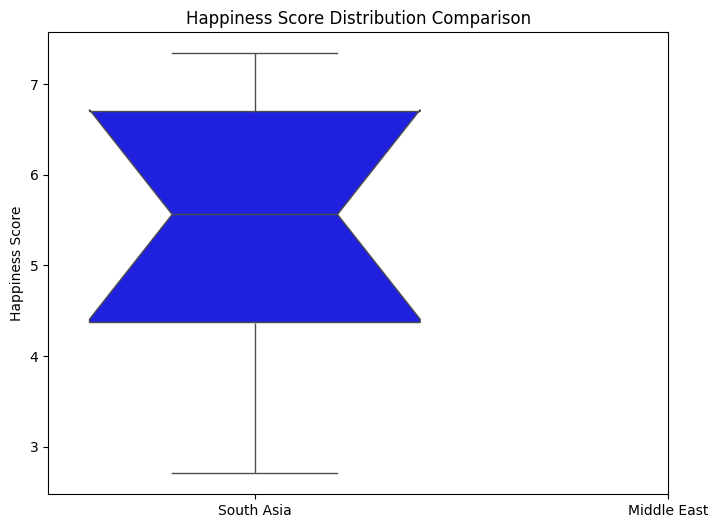

In [ ]:
# Task 7: Boxplot Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette=['blue', 'orange'], notch=True)
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Happiness Score Distribution Comparison')
plt.ylabel('Happiness Score')
plt.show()